<a href="https://colab.research.google.com/github/verma7jr/102003703Sampling/blob/main/LiverDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [ ]:
data=pd.read_csv('/content/indian_liver_patient.csv')

In [ ]:
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [ ]:
data.info() #we can see here there is only one generic column object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
#numerical attribute and outliers
data.describe()


,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


PreProcessing

In [ ]:
#preprocessing
data.isna().sum()#it calculate no of null values in each attribute

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio' ].mean()
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

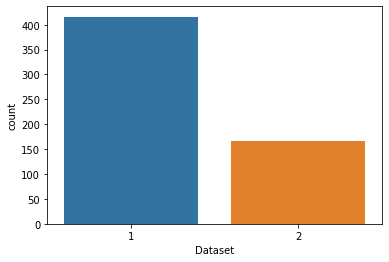

In [ ]:
#count plot shows the ratio of liver patient
sns.countplot(x ='Dataset', data=data )
plt.show()

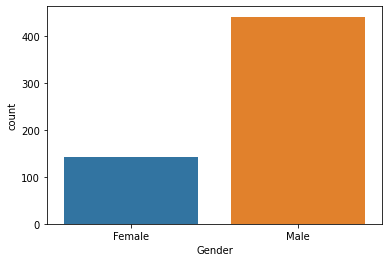

In [ ]:
#count plot shows the ratio of gender of liver patients
sns.countplot(x ='Gender', data=data )
plt.show()

In [ ]:
##Removing duplicate values
data=data[-data.duplicated(subset=None,keep='first')]

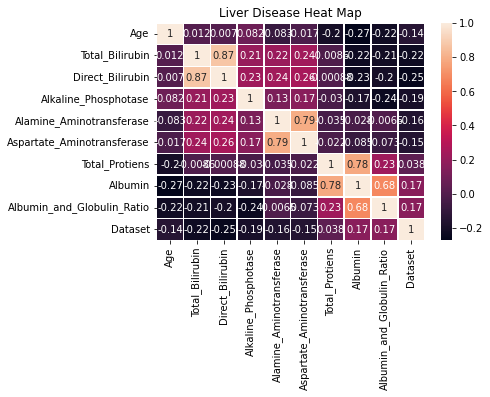

In [ ]:
#Generating Heat Map to show correlation
data_set=data.loc[:,data.columns!="Gender"]
ax = sns.heatmap(data_set.corr(),linewidths=0.5 ,annot=True)

plt.title( "Liver Disease Heat Map" )
plt.show()

Encoding

In [ ]:
def binary_encode(df, column, positive_value):
    df = df.copy()
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [ ]:
data = binary_encode(data, 'Gender', 'Male')

Let's change the labels to 0, 1 instead of 1, 2

In [ ]:
data = binary_encode(data, 'Dataset', 1)
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


Splitting And Scaling

In [ ]:
y = data['Dataset']
X = data.drop('Dataset', axis=1)


In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 1.24174059, -1.75254916, -0.41864741, ...,  0.27928958,
         0.18973749, -0.15082448],
       [ 1.0568741 ,  0.5705974 ,  1.21011064, ...,  0.92305933,
         0.06412731, -0.6536048 ],
       [ 1.0568741 ,  0.5705974 ,  0.63525486, ...,  0.4632238 ,
         0.18973749, -0.18224825],
       ...,
       [ 0.4406525 ,  0.5705974 , -0.40267919, ..., -0.08857885,
         0.06412731,  0.16341322],
       [-0.85341287,  0.5705974 , -0.32283811, ...,  0.27928958,
         0.31534768,  0.16341322],
       [-0.42205774,  0.5705974 , -0.37074276, ...,  0.73912512,
         1.57144955,  1.73460172]])

Over Sampling

In [ ]:
y=data['Dataset']
X=data.drop(['Dataset'],axis=1)
disease=data[data['Dataset']==1]
no_disease=data[data['Dataset']==0]

In [ ]:
print(disease.shape,no_disease.shape)

(406, 11) (164, 11)


In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(random_state=10)

In [ ]:
X_res, y_res = os.fit_resample(X, y)

In [ ]:
X_res.shape,y_res.shape

((812, 10), (812,))

Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

KNN

The time of execution of above program is : 0.019294261932373047


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


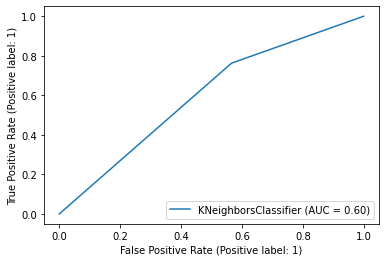

In [ ]:
import time

# record start time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print("The time of execution of above program is :", time.time()-start)
from sklearn import metrics
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=1, p=2,weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=1)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[23 30]
 [28 90]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.45      0.43      0.44        53
           1       0.75      0.76      0.76       118

    accuracy                           0.66       171
   macro avg       0.60      0.60      0.60       171
weighted avg       0.66      0.66      0.66       171



In [ ]:
error_rate = []

In [ ]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

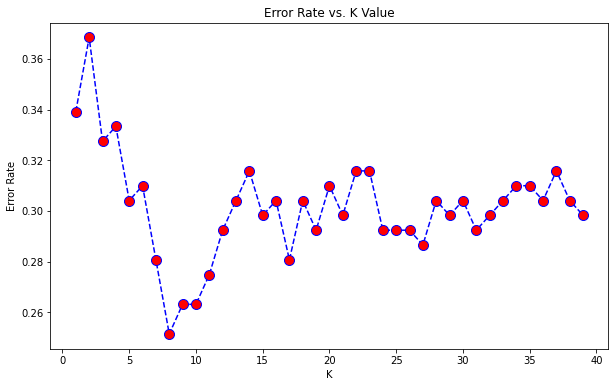

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

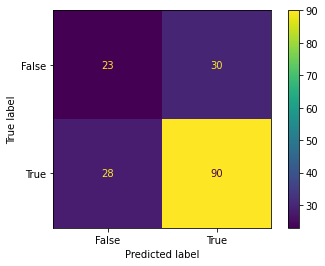

Confusion matrix

 [[23 30]
 [28 90]]
              precision    recall  f1-score   support

           0       0.45      0.43      0.44        53
           1       0.75      0.76      0.76       118

    accuracy                           0.66       171
   macro avg       0.60      0.60      0.60       171
weighted avg       0.66      0.66      0.66       171



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

Random Forest

The time of execution of above program is : 0.23329520225524902


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


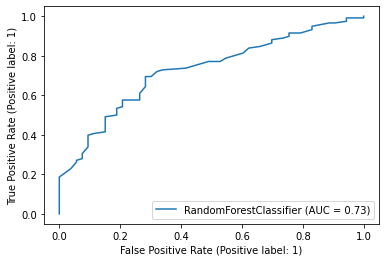

In [ ]:
import time
start = time.time()
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
end = time.time()

print("The time of execution of above program is :", time.time()-start)
metrics.plot_roc_curve(rfc, X_test, y_test)
plt.show()

In [ ]:
print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 17  36]
 [ 17 101]]


              precision    recall  f1-score   support

           0       0.45      0.43      0.44        53
           1       0.75      0.76      0.76       118

    accuracy                           0.66       171
   macro avg       0.60      0.60      0.60       171
weighted avg       0.66      0.66      0.66       171



In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6901


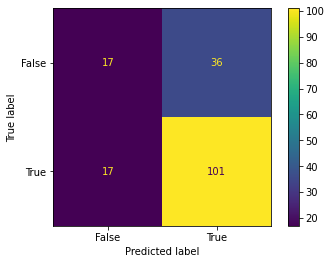

Confusion matrix

 [[ 17  36]
 [ 17 101]]
              precision    recall  f1-score   support

           0       0.50      0.32      0.39        53
           1       0.74      0.86      0.79       118

    accuracy                           0.69       171
   macro avg       0.62      0.59      0.59       171
weighted avg       0.66      0.69      0.67       171



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Ada Boost

The time of execution of above program is : 0.2395763397216797


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


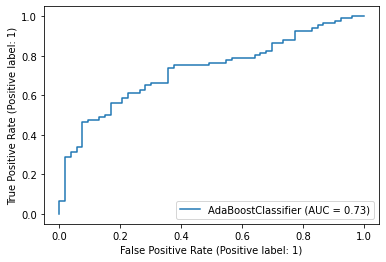

In [ ]:
import time
start = time.time()
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_Pred = clf.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
y_Pred = clf.predict(X_test)

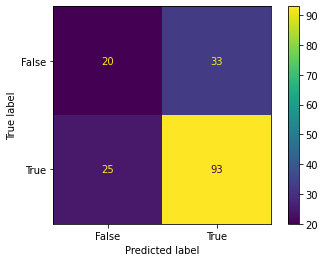

Confusion matrix

 [[20 33]
 [25 93]]
              precision    recall  f1-score   support

           0       0.44      0.38      0.41        53
           1       0.74      0.79      0.76       118

    accuracy                           0.66       171
   macro avg       0.59      0.58      0.59       171
weighted avg       0.65      0.66      0.65       171



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_Pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_Pred))



Linear SVM

In [ ]:
import time
start = time.time()
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_Pred = classifier.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)

The time of execution of above program is : 20.833935260772705


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


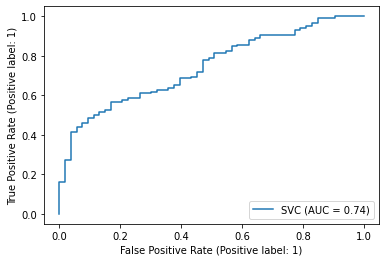

In [ ]:
metrics.plot_roc_curve(classifier, X_test, y_test)
plt.show()

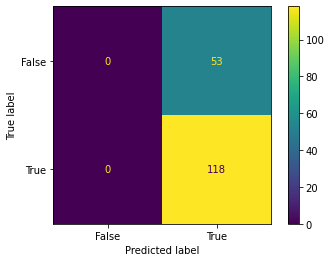

Confusion matrix

 [[  0  53]
 [  0 118]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.69      1.00      0.82       118

    accuracy                           0.69       171
   macro avg       0.35      0.50      0.41       171
weighted avg       0.48      0.69      0.56       171



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_Pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_Pred))

Naive Bayes

The time of execution of above program is : 0.014129638671875


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


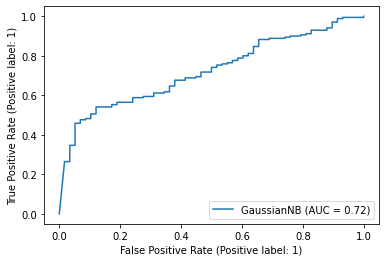

Gaussian Naive Bayes model accuracy(in %): 54.385964912280706


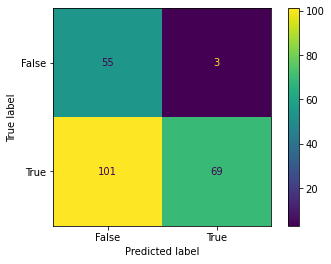

Confusion matrix

 [[ 55   3]
 [101  69]]
              precision    recall  f1-score   support

           0       0.35      0.95      0.51        58
           1       0.96      0.41      0.57       170

    accuracy                           0.54       228
   macro avg       0.66      0.68      0.54       228
weighted avg       0.80      0.54      0.56       228



In [ ]:
import time
start = time.time()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# making predictions on the testing set
y_pred = gnb.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)


metrics.plot_roc_curve(gnb, X_test, y_test)
plt.show()

# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Decision Tree (Ginni Index)

The time of execution of above program is : 0.011196613311767578


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


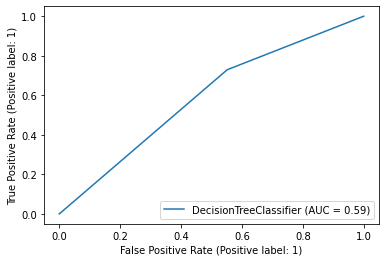

In [ ]:
import time
start = time.time()
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6578947368421053


[Text(0.688647342995169, 0.9705882352941176, 'X[3] <= 1.05\ngini = 0.428\nsamples = 342\nvalue = [106, 236]'),
 Text(0.45458937198067634, 0.9117647058823529, 'X[4] <= 212.5\ngini = 0.485\nsamples = 245\nvalue = [101, 144]'),
 Text(0.16231884057971013, 0.8529411764705882, 'X[5] <= 19.5\ngini = 0.499\nsamples = 151\nvalue = [78, 73]'),
 Text(0.05410628019323672, 0.7941176470588235, 'X[7] <= 4.85\ngini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(0.03864734299516908, 0.7352941176470589, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.06956521739130435, 0.7352941176470589, 'X[9] <= 0.924\ngini = 0.35\nsamples = 31\nvalue = [24, 7]'),
 Text(0.030917874396135265, 0.6764705882352942, 'X[8] <= 2.95\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.015458937198067632, 0.6176470588235294, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.0463768115942029, 0.6176470588235294, 'X[6] <= 66.0\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.030917874396135265, 0.5588235294117647, 'gin

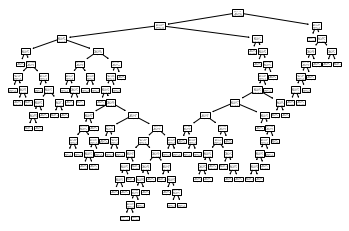

In [ ]:
from sklearn import tree
tree.plot_tree(clf)

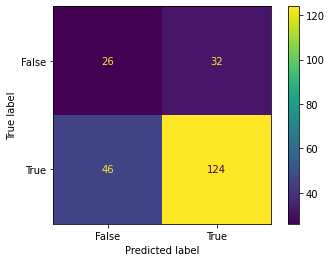

Confusion matrix

 [[ 26  32]
 [ 46 124]]
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        58
           1       0.79      0.73      0.76       170

    accuracy                           0.66       228
   macro avg       0.58      0.59      0.58       228
weighted avg       0.68      0.66      0.67       228



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Gradient Boosting Classifier

In [ ]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
import time
start = time.time()

The time of execution of above program is : 0.14239883422851562


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


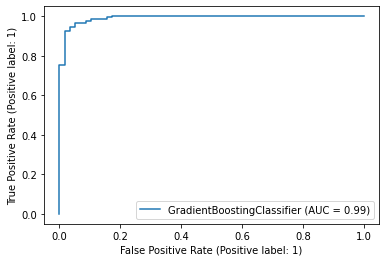

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
...     max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_test, y_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)

metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()


In [ ]:
print("Accuracy score (training): {0:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(clf.score(X_test, y_test)))

Accuracy score (training): 0.658
Accuracy score (validation): 0.956


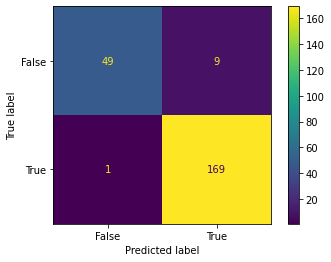

Confusion matrix

 [[ 49   9]
 [  1 169]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        58
           1       0.95      0.99      0.97       170

    accuracy                           0.96       228
   macro avg       0.96      0.92      0.94       228
weighted avg       0.96      0.96      0.96       228



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier

0.6754385964912281


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


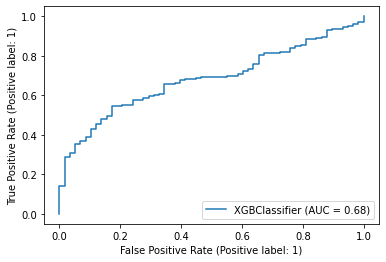

The time of execution of above program is : 0.35080409049987793


In [ ]:
import time
start = time.time()
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
score = xgb_clf.score(X_test, y_test)
print(score)
metrics.plot_roc_curve(xgb_clf, X_test, y_test)
plt.show()
y_pred=xgb_clf.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)

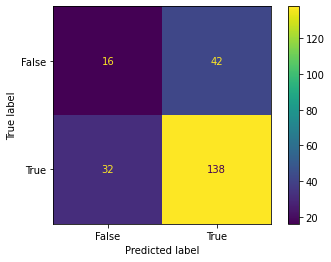

Confusion matrix

 [[ 16  42]
 [ 32 138]]
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        58
           1       0.77      0.81      0.79       170

    accuracy                           0.68       228
   macro avg       0.55      0.54      0.55       228
weighted avg       0.66      0.68      0.66       228



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

Extra Tree Method in Python

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix

ExtraTreesClassifier()
Score:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


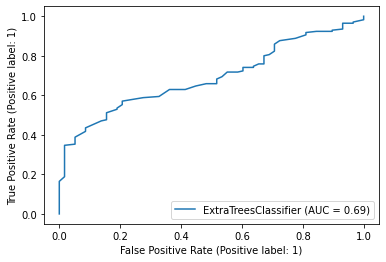

The time of execution of above program is : 0.39911961555480957


In [ ]:
import time
start = time.time()
clf = ExtraTreesClassifier(n_estimators=100)
print(clf)
from sklearn.metrics import confusion_matrix
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Score: ", score)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()
end = time.time()
print("The time of execution of above program is :", time.time()-start)

In [ ]:
cv_scores = cross_val_score(clf,X_train, y_train , cv=5 )
print("CV average score: %.2f" % cv_scores.mean())


CV average score: 0.73


In [ ]:
ypred = clf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, ypred)
print(cm)


[[ 19  39]
 [ 38 132]]


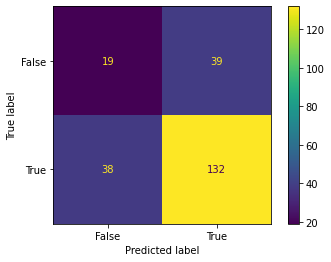

Confusion matrix

 [[ 19  39]
 [ 38 132]]
              precision    recall  f1-score   support

           0       0.33      0.33      0.33        58
           1       0.77      0.78      0.77       170

    accuracy                           0.66       228
   macro avg       0.55      0.55      0.55       228
weighted avg       0.66      0.66      0.66       228



In [ ]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

Logistic Regression

LogisticRegression()
Score:  0.7076023391812866


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


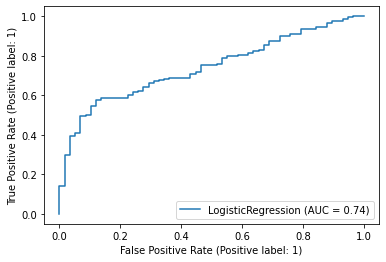

The time of execution of above program is : 0.24513721466064453


In [ ]:
import time
start = time.time()
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = LogisticRegression()
print(clf)
from sklearn.metrics import confusion_matrix
clf.fit(X_train, y_train)
score = clf.score(X_train, y_train)
print("Score: ", score)
metrics.plot_roc_curve(clf, X_test, y_test)
plt.show()
ypred = clf.predict(X_test)
end = time.time()
print("The time of execution of above program is :", time.time()-start)

In [ ]:
cv_scores = cross_val_score(clf,X_train, y_train , cv=5 )
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.69


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
cm = confusion_matrix(y_test, ypred)
print(cm)

[[ 19  39]
 [ 25 145]]


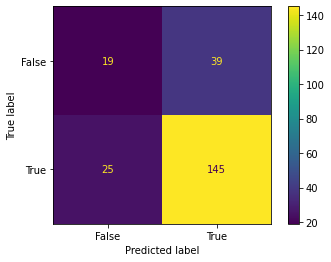

Confusion matrix

 [[ 19  39]
 [ 25 145]]
              precision    recall  f1-score   support

           0       0.43      0.33      0.37        58
           1       0.79      0.85      0.82       170

    accuracy                           0.72       228
   macro avg       0.61      0.59      0.60       228
weighted avg       0.70      0.72      0.71       228



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

cm = confusion_matrix(y_test, ypred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

cm_display.plot()
plt.show()

print('Confusion matrix\n\n', cm)
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))